# Collate results

In [1]:
import os
import re

# Directory containing the simulation output files
directory = '/Users/rahulvigneswaran/Documents/Assign4_DONE/results_200M'  # Replace with the actual path to your files

# Ordered list of traces (as per your bash script)
traces = [
    "603.bwaves_s-3699B.champsimtrace.xz",
    "648.exchange2_s-1699B.champsimtrace.xz",
    "638.imagick_s-10316B.champsimtrace.xz",
    "644.nab_s-5853B.champsimtrace.xz",
    "627.cam4_s-573B.champsimtrace.xz",
    "600.perlbench_s-210B.champsimtrace.xz",
    "623.xalancbmk_s-700B.champsimtrace.xz",
    "654.roms_s-842B.champsimtrace.xz",
    "625.x264_s-18B.champsimtrace.xz",
    "607.cactuBSSN_s-2421B.champsimtrace.xz",
    "631.deepsjeng_s-928B.champsimtrace.xz",
    "628.pop2_s-17B.champsimtrace.xz",
    "649.fotonik3d_s-1176B.champsimtrace.xz",
]

# Q4Flag values used in your simulations
Q4Flags = ['0', '1']

# Data structure to hold extracted data grouped by Q4Flag value
data = {flag: [] for flag in Q4Flags}

# Iterate over Q4Flag values
for Q4Flag in Q4Flags:
    # For each Q4Flag value, process traces in order
    for trace in traces:
        # Construct the expected filename
        # Assuming the filename pattern is:
        # "{trace}-bimodal-no-no-no-no-srrip-1core-4MB--1-{Q4Flag}.txt"
        trace_basename = os.path.basename(trace)
        filename = f"{trace_basename}-bimodal-no-no-no-no-srrip-1core-4MB--1-{Q4Flag}.txt"
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r') as file:
                lines = file.readlines()
                # Find the last line containing performance metrics
                metrics_line = None
                for i in range(len(lines)-1, -1, -1):
                    line = lines[i].strip()
                    # Skip empty lines
                    if not line:
                        continue
                    # Match the line with performance metrics
                    if re.match(r'^\d+\.\d+,', line):
                        metrics_line = line
                        break
                if not metrics_line:
                    print(f'Metrics line not found in file: {filename}')
                    data[Q4Flag].append('')  # Append an empty string or placeholder
                else:
                    data[Q4Flag].append(metrics_line)
        else:
            print(f'File not found: {filename}')
            data[Q4Flag].append('')  # Append an empty string or placeholder

# Write the data to a CSV file
output_file = 'task4.csv'
with open(output_file, 'w') as f:
    for Q4Flag in Q4Flags:
        # Write the Q4Flag value line
        f.write(f'{Q4Flag},\n')
        # Write the data lines for this Q4Flag value
        for metrics_line in data[Q4Flag]:
            f.write(f'{metrics_line}\n')
        # Optionally, add an empty line between Q4Flag values
        # f.write('\n')

print(f'Data has been written to {output_file}')


Data has been written to task4.csv


# Plot

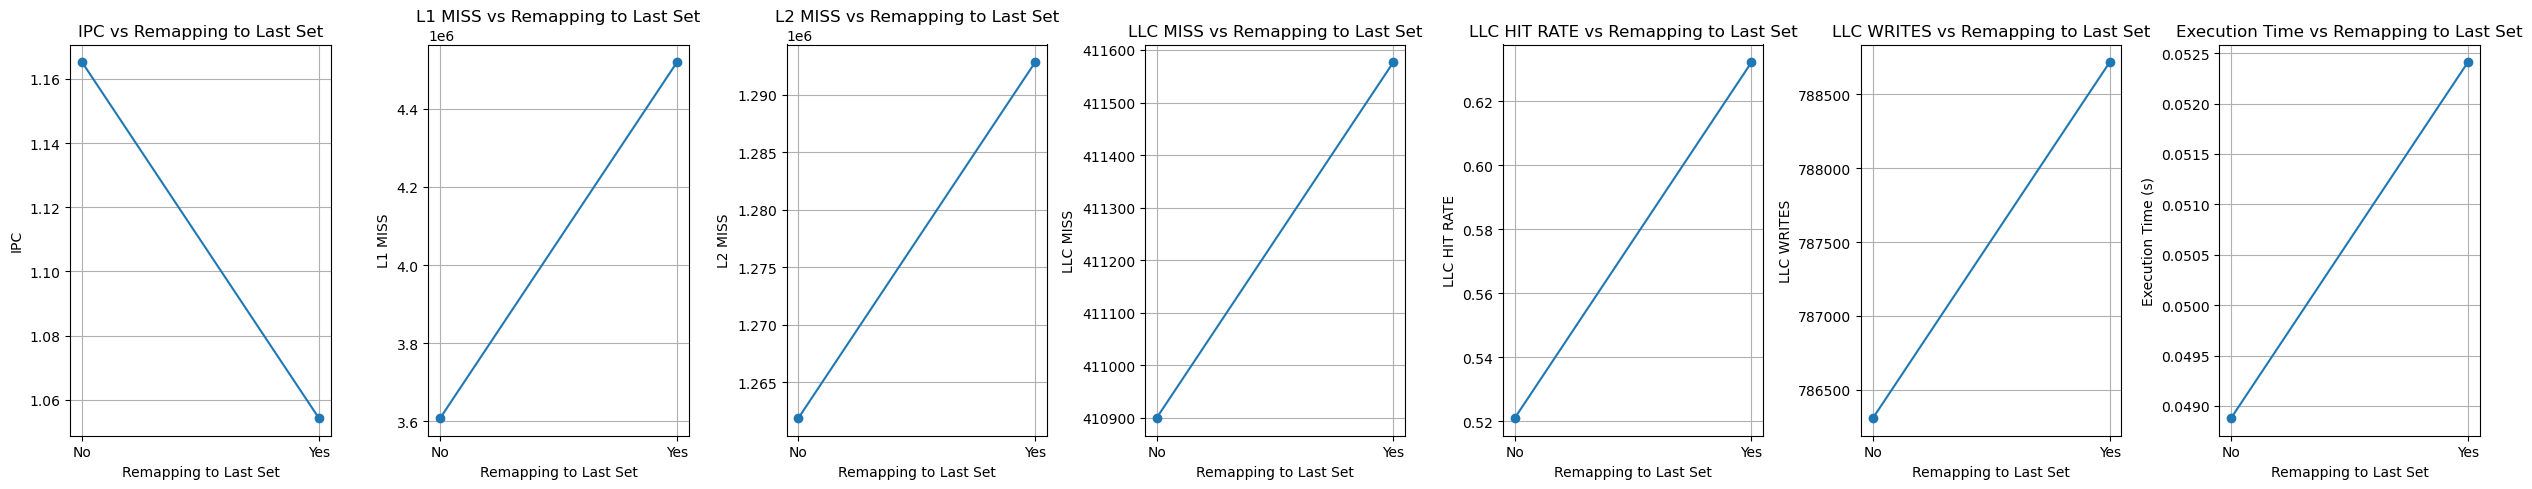

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
remapping = ['No', 'Yes']
ipc = [1.165164462, 1.054310154]
l1_miss = [3608726.077, 4518882.077]
l2_miss = [1261913.846, 1292839.077]
llc_miss = [410899.7692, 411576.5385]
llc_hit_rate = [0.5210099231, 0.6321376923]
llc_writes = [786308.6154, 788717.7692]
execution_time = [0.04888084462, 0.05241013077]

# Prepare subplots - 1 row, 7 columns
fig, axs = plt.subplots(1, 7, figsize=(25, 5))

# List of data and labels to plot
data = [
    (ipc, 'IPC', 'IPC vs Remapping to Last Set'),
    (l1_miss, 'L1 MISS', 'L1 MISS vs Remapping to Last Set'),
    (l2_miss, 'L2 MISS', 'L2 MISS vs Remapping to Last Set'),
    (llc_miss, 'LLC MISS', 'LLC MISS vs Remapping to Last Set'),
    (llc_hit_rate, 'LLC HIT RATE', 'LLC HIT RATE vs Remapping to Last Set'),
    (llc_writes, 'LLC WRITES', 'LLC WRITES vs Remapping to Last Set'),
    (execution_time, 'Execution Time (s)', 'Execution Time vs Remapping to Last Set')
]

# Plot each variable in the respective subplot
for i, (y, ylabel, title) in enumerate(data):
    axs[i].plot(remapping, y, marker='o')
    axs[i].set_xlabel('Remapping to Last Set')
    axs[i].set_ylabel(ylabel)
    axs[i].set_title(title)
    axs[i].grid(True)

# Adjust layout to fit all plots
plt.tight_layout()
plt.show()